<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [1]:
'''# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 -q --user
'''

'# Installing the libraries with the specified version.\n!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 -q --user\n'

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# Standard import of a Comma Separated Values file
Churn = pd.read_csv("Churn.csv")

# Making a copy to avoid corrupting the original data
data = Churn.copy()

## Data Overview

In [4]:
# Using a quick trick to see the simple shape of the data.
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10000 rows and 14 columns.


In [5]:
# Using the .head() function to see what the data set looks like.
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* RowNumber and CustomerID likely serve no purpose. Exited is our target variable.

In [6]:
# Looking at the data types of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There seems to be no null points in the data. There are 3 object and 11 int64 or float64 numerical.

In [7]:
# Checking the dataset for duplicated rows.
data.duplicated().sum()

0

* There are no duplicated rows in the dataset.

In [8]:
# Verifying that there are no missing values in the dataset.
data.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* This verifies that there are no missing values.

In [9]:
# Checking the number of unique data points in each column of the dataset.
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* There are 10000 of 10000 unique entries for RowNumber and CustomerID making them useless in this dataset. I think the Surname is also just an identifier. The estimated salary also has a high number of unique data points but I think it will prove important.  

In [10]:
# Making a summary of the categorical columns
cat_cols = ["Surname", "Geography", "Gender"]

for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
--------------------------------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
--------------------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------------------------------------


* This shows that the surname column is useless. There are 3 countries in geography, and nothing special about the gender column.

In [11]:
# Looking at the mathematical properties of the dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* The estimated salary has a large variety and a super low min. I finid it odd that there is an entry for 11.58. Seems super low.

In [12]:
# dropping the RowNumber, CustomerID, and Surname columns as they do not add any useful information
data.drop(columns=["RowNumber", "CustomerId", "Surname",], axis=1, inplace=True)

## Exploratory Data Analysis

### Univariate Analysis

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

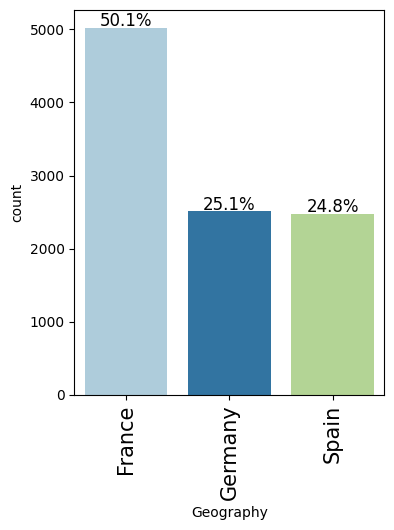

In [15]:
labeled_barplot(data, "Geography", perc=True)

* Half of the customers are from France. The remainder are split between Germany and Spain. 

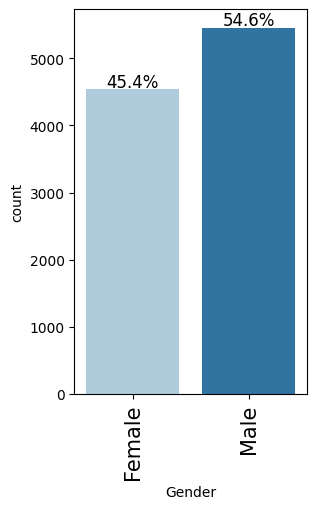

In [16]:
labeled_barplot(data, "Gender", perc=True)

* A majority of the customers are male at 54.6%.

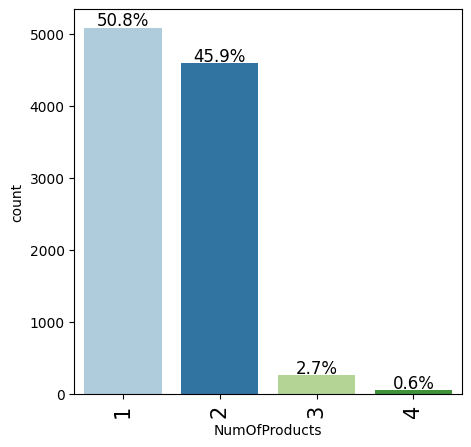

In [17]:
labeled_barplot(data, "NumOfProducts", perc=True)

* 50.8% of customers have one product and 45.9% have two. The remaining 3.3% are split between 3 products at 2.7% and 4 products at 0.6%.

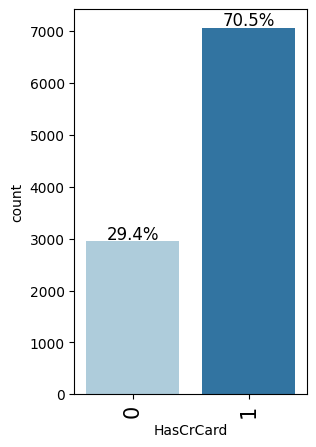

In [18]:
labeled_barplot(data, "HasCrCard", perc=True)

* 70.5 percent of the customers have a credit card.

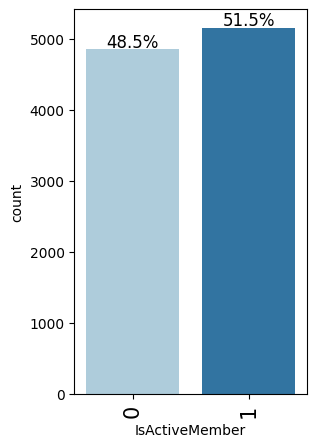

In [19]:
labeled_barplot(data, "IsActiveMember", perc=True)

* Only 51.5% of the customers are active members.

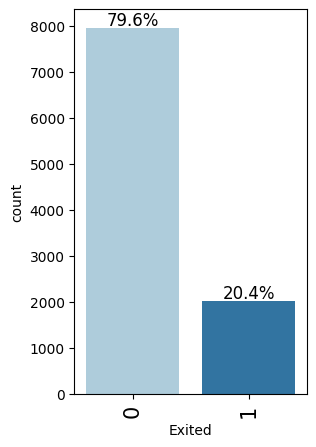

In [20]:
labeled_barplot(data, "Exited", perc=True)

* Our target variable shows 20.4% exited which is the number we are trying to find the factors that lead to it.

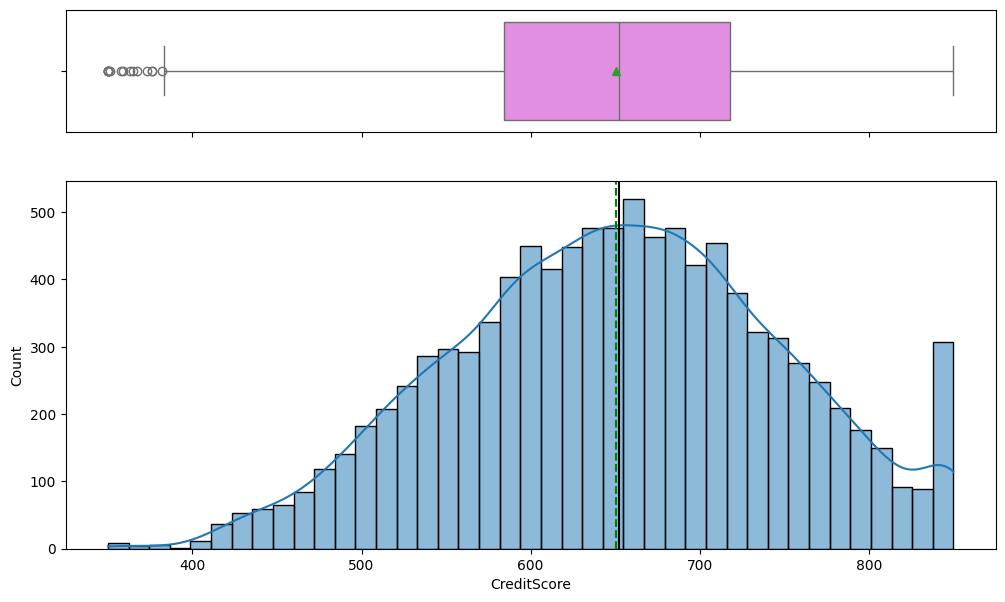

In [21]:
histogram_boxplot(data, "CreditScore", kde=True)

* The data is slightly skewed to the left, but there is an interesting peak at the high end.

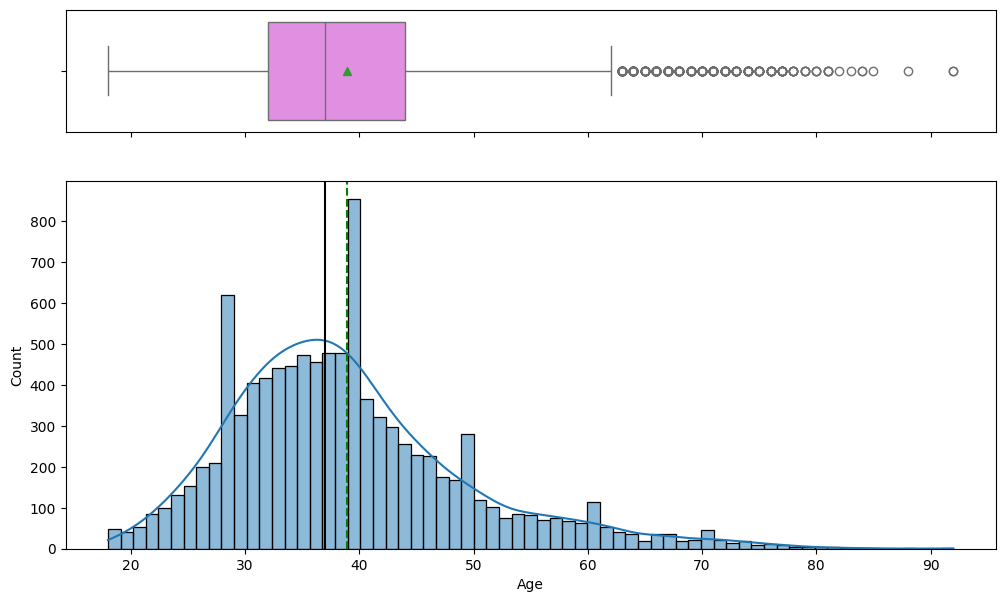

In [22]:
histogram_boxplot(data, "Age", kde=True)

* The age data is heavily skewed to the right with two major peaks and 3 minor peaks.

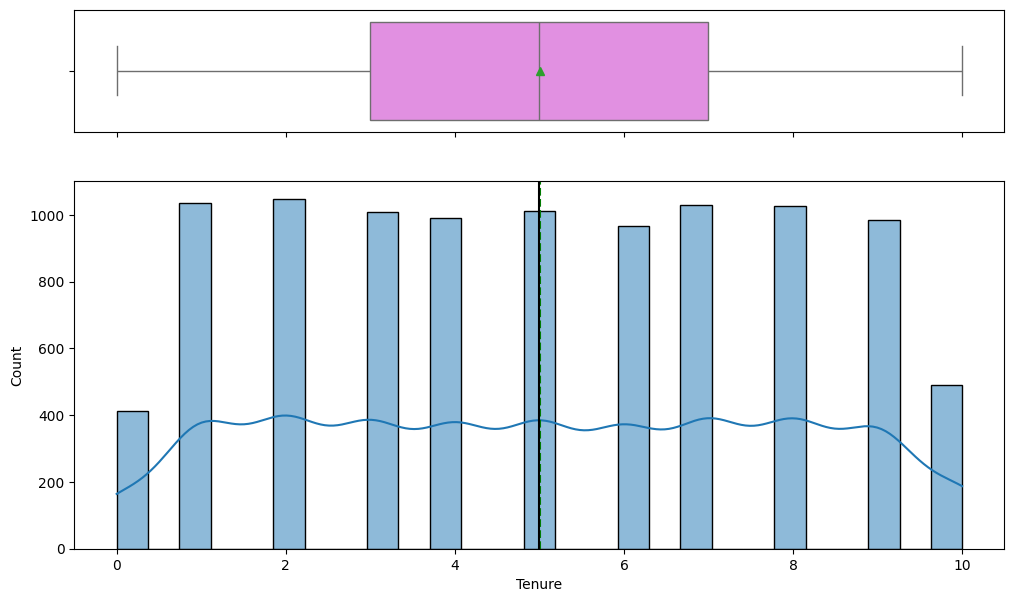

In [23]:
histogram_boxplot(data, "Tenure", kde=True)

* The tenure is very evenly distributed.

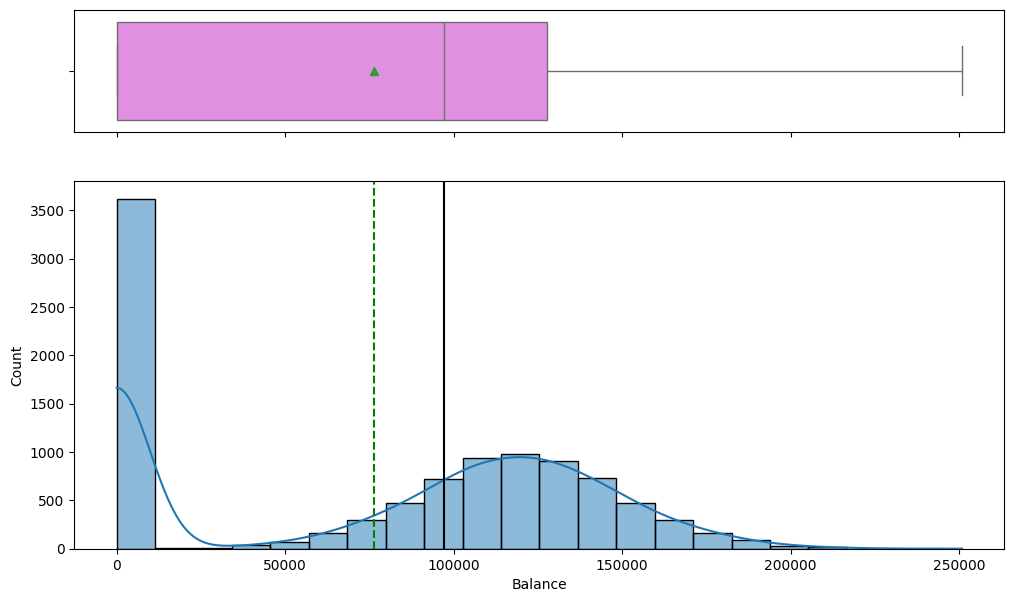

In [24]:
histogram_boxplot(data, "Balance", kde=True)

* The balance catagory is heavily skewed to the left due to a huge peak at 0.

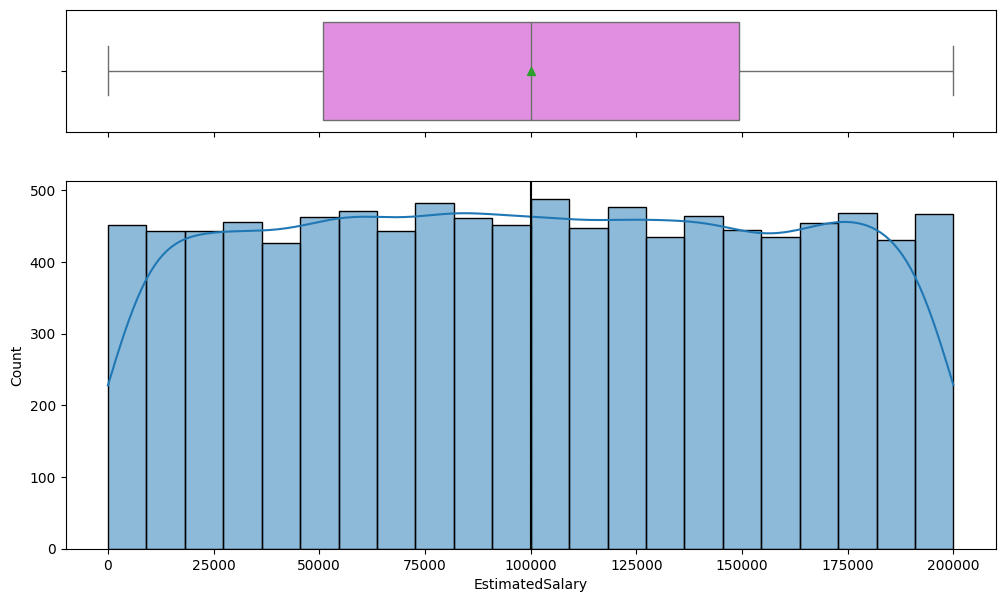

In [25]:
histogram_boxplot(data, "EstimatedSalary", kde=True)

* The estimated salary is evenly distributed.

### Bivariate Analysis

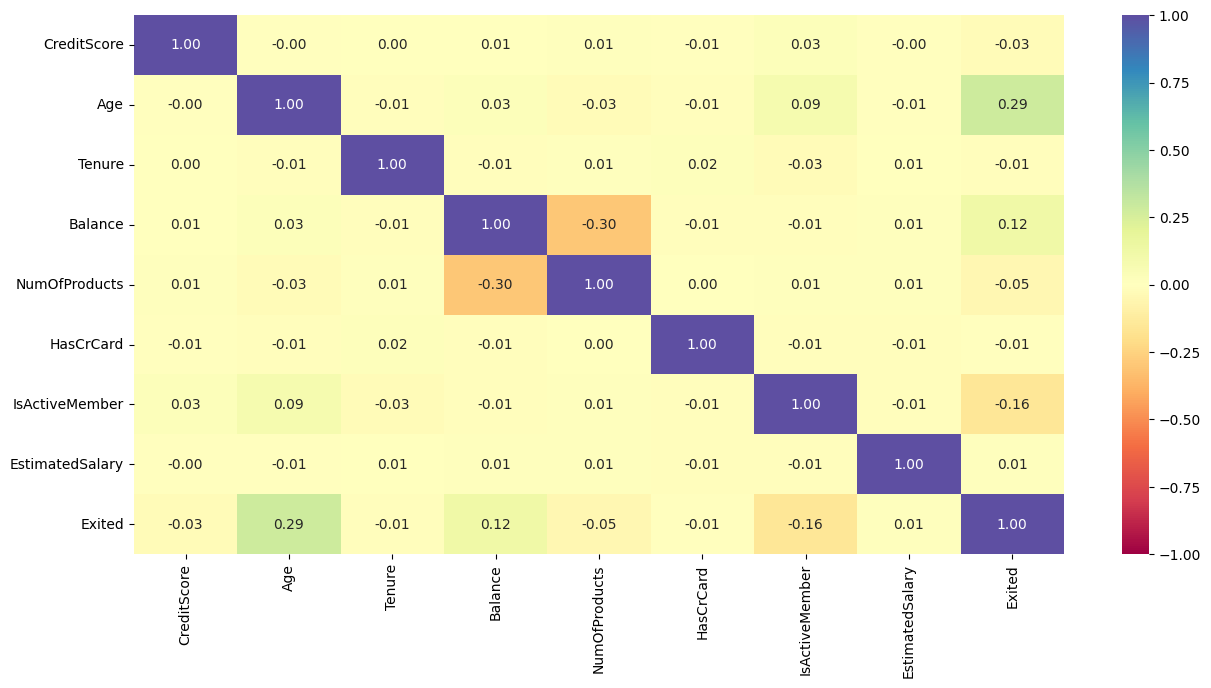

In [26]:
# Making a heatmap of the data to look for correlation.
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Looking at the target column (Exited), there are positive correlations between Exited and Age at 0.29 as well as Exited and Balance at 0.12. There are negative correlation with ISActiveMember and Exited -0.26. The only other noticeable correlation is a negative correlation between NumOfProducts and Balance at -0.30.

In [27]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


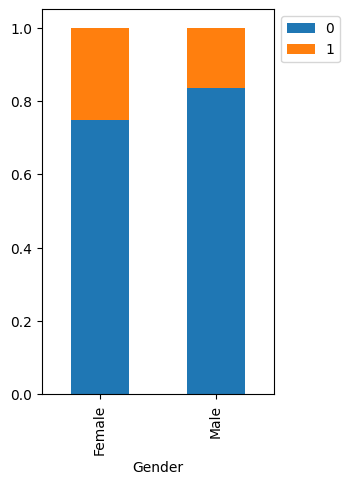

In [28]:
stacked_barplot(data, "Gender", "Exited")

* It looks like a higher percentage of females exited as compared to males.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


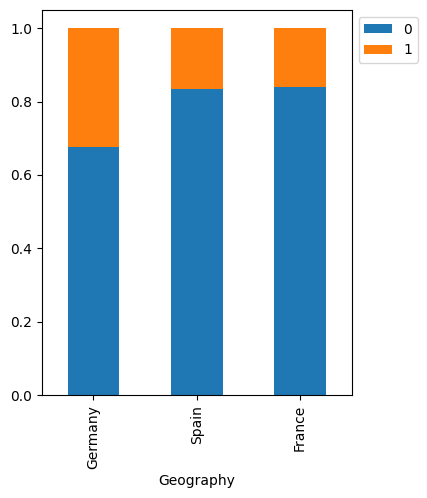

In [29]:
stacked_barplot(data, "Geography", "Exited")

* Customers from Germany have a higher rate of exiting than customers from Spain or France.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


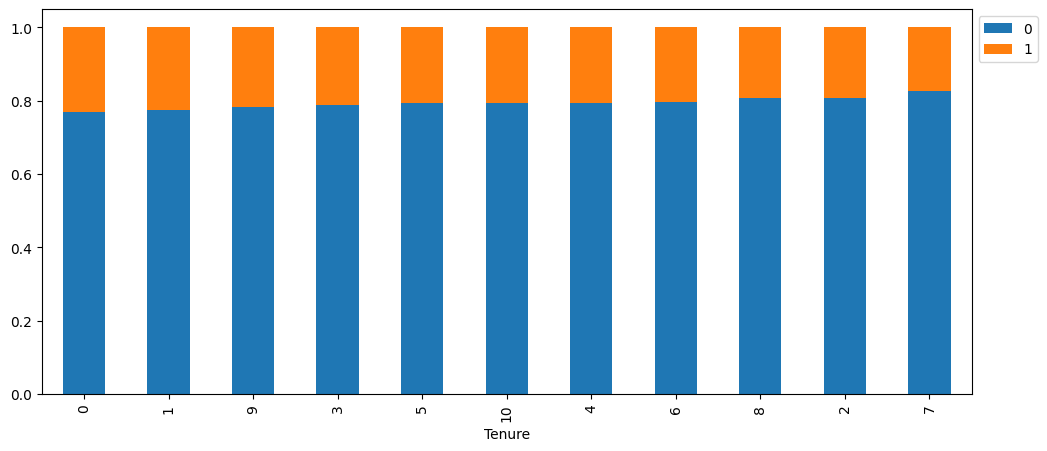

In [30]:
stacked_barplot(data, "Tenure", "Exited")

* The customers with 0 or 1 have the highest levels of exiting.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


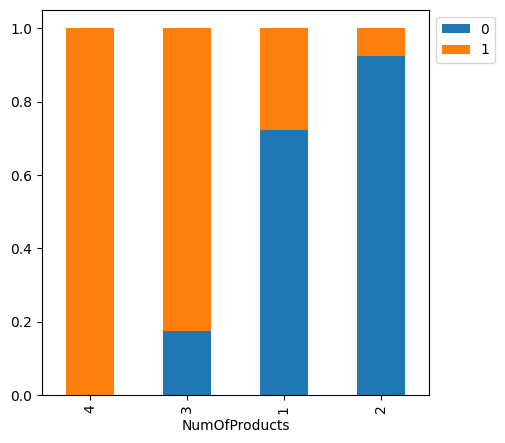

In [31]:
stacked_barplot(data, "NumOfProducts", "Exited")

* The data shows that the customers with 3 or 4 products have very high levels of exiting.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


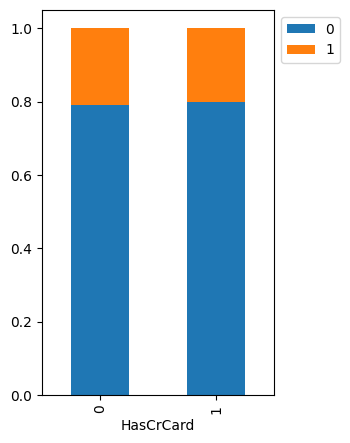

In [32]:
stacked_barplot(data, "HasCrCard", "Exited")

* Customers without a credit card tend to exit at a slightly higher rate.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


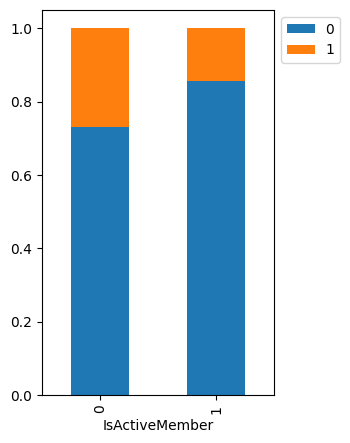

In [33]:
stacked_barplot(data, "IsActiveMember", "Exited")

* Customers that are not as active have higher rates of exiting.

## Data Preprocessing

### Train-validation-test Split

In [34]:
# Splitting independent and dependent variables into X and Y respectively
X = data.drop(["Exited"], axis=1)
Y = data[["Exited"]]

print(X.shape)
print(Y.shape)

(10000, 10)
(10000, 1)


In [35]:
# Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [36]:
# Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

### Dummy Variable Creation

In [37]:
# Storing categorical variables in a list for making dummies.
catagorical_data = ["Geography",'Gender']

In [38]:
# Creating dummies with the previous list.
X_train = pd.get_dummies(X_train, columns=catagorical_data, drop_first=True)
X_test = pd.get_dummies(X_test, columns=catagorical_data, drop_first=True)
X_val = pd.get_dummies(X_val, columns=catagorical_data, drop_first=True)

### Data Normalization

In [39]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

In [40]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6400, 11)
(1600, 11)
(6400, 1)
(1600, 1)
(2000, 11)
(2000, 1)


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- The bank would want to minimize the chances of False Negatives so Recall would be the best metric

In [41]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [42]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [43]:
backend.clear_session()
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)

In [44]:
model1 = Sequential()
model1.add(Dense(64, activation="relu", input_dim = X_train.shape[1]))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [46]:
history = model1.fit(X_train, y_train, batch_size=10 ,validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100

640/640 [==============================] - 3s 4ms/step - loss: 0.6201 - recall: 0.2307 - val_loss: 0.5192 - val_recall: 0.0000e+00
Epoch 2/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4980 - recall: 0.0000e+00 - val_loss: 0.4902 - val_recall: 0.0000e+00
Epoch 3/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4816 - recall: 0.0000e+00 - val_loss: 0.4804 - val_recall: 0.0000e+00
Epoch 4/100
640/640 [==============================] - 2s 4ms/step - loss: 0.4729 - recall: 0.0000e+00 - val_loss: 0.4731 - val_recall: 0.0000e+00
Epoch 5/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4658 - recall: 0.0000e+00 - val_loss: 0.4669 - val_recall: 0.0000e+00
Epoch 6/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4597 - recall: 7.7399e-04 - val_loss: 0.4616 - val_recall: 0.0030
Epoch 7/100
640/640 [==============================] - 2s 4ms/step - loss: 0.4545 - recall: 0.0031 - val_loss: 0.4569 - val_r

640/640 [==============================] - 2s 3ms/step - loss: 0.4048 - recall: 0.2701 - val_loss: 0.4166 - val_recall: 0.2727
Epoch 58/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4045 - recall: 0.2748 - val_loss: 0.4163 - val_recall: 0.2758
Epoch 59/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4041 - recall: 0.2779 - val_loss: 0.4160 - val_recall: 0.2606
Epoch 60/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4039 - recall: 0.2709 - val_loss: 0.4158 - val_recall: 0.2727
Epoch 61/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4035 - recall: 0.2763 - val_loss: 0.4156 - val_recall: 0.2727
Epoch 62/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4032 - recall: 0.2686 - val_loss: 0.4155 - val_recall: 0.2788
Epoch 63/100
640/640 [==============================] - 2s 4ms/step - loss: 0.4029 - recall: 0.2786 - val_loss: 0.4152 - val_recall: 0.2727
Epoch 64/100
640/640 [===========

In [47]:
score1 = model1.evaluate(X_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.3932 - recall: 0.3108


In [48]:
y_train_pred1 = model1.predict(X_train)
y_train_pred1 = (y_train_pred1 > 0.5)
y_train_pred1

200/200 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [49]:
y_val_pred1 = model1.predict(X_val)
y_val_pred1 = (y_val_pred1 > 0.5)
y_val_pred1

50/50 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [50]:
model_name = "Model 1 SDG"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred1)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred1)

In [51]:
cr_1_1 = classification_report(y_train, y_train_pred1)
print(cr_1_1)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      5108
           1       0.71      0.31      0.44      1292

    accuracy                           0.84      6400
   macro avg       0.78      0.64      0.67      6400
weighted avg       0.82      0.84      0.81      6400



In [52]:
cr_1_2 = classification_report(y_val, y_val_pred1)
print(cr_1_2)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1270
           1       0.69      0.30      0.42       330

    accuracy                           0.83      1600
   macro avg       0.77      0.63      0.66      1600
weighted avg       0.81      0.83      0.80      1600



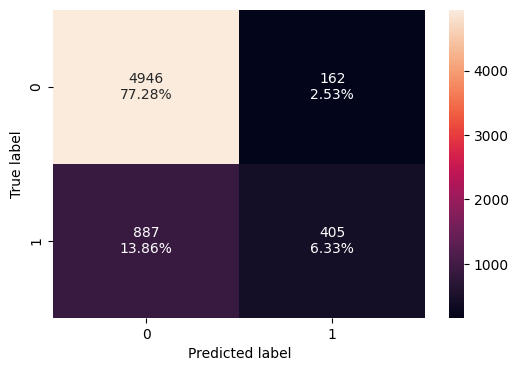

In [53]:
make_confusion_matrix(y_train, y_train_pred1)

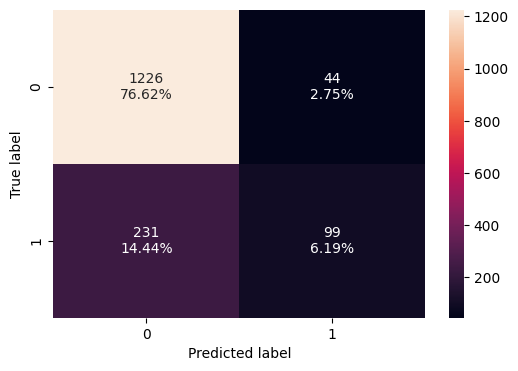

In [54]:
make_confusion_matrix(y_val, y_val_pred1)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [55]:
backend.clear_session()
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)

In [56]:
model2 = Sequential()
model2.add(Dense(64, activation="relu", input_dim = X_train.shape[1]))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
optimizer = tf.keras.optimizers.Adam(0.001)
metric = keras.metrics.Recall()
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [58]:
history = model2.fit(X_train, y_train, batch_size=10 ,validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
640/640 [==============================] - 3s 3ms/step - loss: 0.4386 - recall: 0.1687 - val_loss: 0.4212 - val_recall: 0.3848
Epoch 2/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4009 - recall: 0.3065 - val_loss: 0.4065 - val_recall: 0.3727
Epoch 3/100
640/640 [==============================] - 2s 3ms/step - loss: 0.3796 - recall: 0.3599 - val_loss: 0.3977 - val_recall: 0.3303
Epoch 4/100
640/640 [==============================] - 2s 2ms/step - loss: 0.3638 - recall: 0.4040 - val_loss: 0.3821 - val_recall: 0.4152
Epoch 5/100
640/640 [==============================] - 2s 3ms/step - loss: 0.3501 - recall: 0.4412 - val_loss: 0.3805 - val_recall: 0.5000
Epoch 6/100
640/640 [==============================] - 2s 3ms/step - loss: 0.3392 - recall: 0.4481 - val_loss: 0.4017 - val_recall: 0.5758
Epoch 7/100
640/640 [==============================] - 2s 3ms/step - loss: 0.3325 - recall: 0.4752 - val_loss: 0.3743 - val_recall: 0.4182
Epoch 8/100
640/640 [======

640/640 [==============================] - 2s 3ms/step - loss: 0.2248 - recall: 0.6734 - val_loss: 0.4598 - val_recall: 0.4848
Epoch 60/100
640/640 [==============================] - 2s 2ms/step - loss: 0.2235 - recall: 0.6633 - val_loss: 0.4585 - val_recall: 0.4939
Epoch 61/100
640/640 [==============================] - 2s 3ms/step - loss: 0.2197 - recall: 0.6726 - val_loss: 0.4689 - val_recall: 0.5333
Epoch 62/100
640/640 [==============================] - 2s 3ms/step - loss: 0.2182 - recall: 0.6757 - val_loss: 0.4687 - val_recall: 0.5606
Epoch 63/100
640/640 [==============================] - 2s 3ms/step - loss: 0.2171 - recall: 0.6873 - val_loss: 0.4751 - val_recall: 0.5485
Epoch 64/100
640/640 [==============================] - 2s 4ms/step - loss: 0.2133 - recall: 0.6896 - val_loss: 0.4715 - val_recall: 0.5364
Epoch 65/100
640/640 [==============================] - 2s 3ms/step - loss: 0.2145 - recall: 0.6920 - val_loss: 0.4880 - val_recall: 0.4970
Epoch 66/100
640/640 [===========

In [59]:
score2 = model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.5688 - recall: 0.4699


In [60]:
y_train_pred2 = model2.predict(X_train)
y_train_pred2 = (y_train_pred2 > 0.5)
y_train_pred2

200/200 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [61]:
y_val_pred2 = model2.predict(X_val)
y_val_pred2 = (y_val_pred2 > 0.5)
y_val_pred2

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [62]:
model_name2 = "Model 2 Adam"

train_metric_df.loc[model_name2] = recall_score(y_train,y_train_pred2)
valid_metric_df.loc[model_name2] = recall_score(y_val,y_val_pred2)

In [63]:
cr_2_1 = classification_report(y_train, y_train_pred2)
print(cr_2_1)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5108
           1       0.94      0.74      0.83      1292

    accuracy                           0.94      6400
   macro avg       0.94      0.86      0.89      6400
weighted avg       0.94      0.94      0.93      6400



In [64]:
cr_2_2 = classification_report(y_val, y_val_pred2)
print(cr_2_2)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1270
           1       0.62      0.45      0.52       330

    accuracy                           0.83      1600
   macro avg       0.74      0.69      0.71      1600
weighted avg       0.82      0.83      0.82      1600



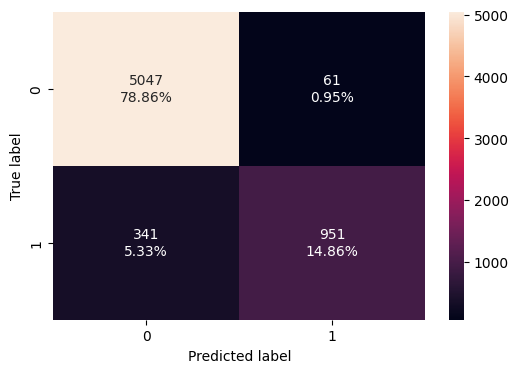

In [65]:
make_confusion_matrix(y_train, y_train_pred2)

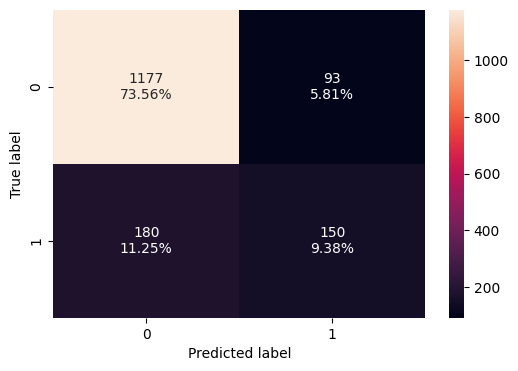

In [66]:
make_confusion_matrix(y_val, y_val_pred2)

### Neural Network with Adam Optimizer and Dropout

In [67]:
backend.clear_session()
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)

In [68]:
model3 = Sequential()
model3.add(Dense(64, activation="relu", input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
optimizer = tf.keras.optimizers.Adam(0.001)
metric = keras.metrics.Recall()
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [70]:
history = model3.fit(X_train, y_train, batch_size=10 ,validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
640/640 [==============================] - 3s 4ms/step - loss: 0.4583 - recall: 0.1207 - val_loss: 0.4239 - val_recall: 0.2364
Epoch 2/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4243 - recall: 0.2353 - val_loss: 0.4180 - val_recall: 0.3152
Epoch 3/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4126 - recall: 0.2817 - val_loss: 0.4116 - val_recall: 0.2455
Epoch 4/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4007 - recall: 0.3289 - val_loss: 0.3990 - val_recall: 0.3273
Epoch 5/100
640/640 [==============================] - 2s 3ms/step - loss: 0.3886 - recall: 0.3506 - val_loss: 0.3915 - val_recall: 0.3818
Epoch 6/100
640/640 [==============================] - 2s 3ms/step - loss: 0.3773 - recall: 0.3854 - val_loss: 0.3903 - val_recall: 0.4333
Epoch 7/100
640/640 [==============================] - 2s 3ms/step - loss: 0.3683 - recall: 0.4009 - val_loss: 0.3861 - val_recall: 0.3455
Epoch 8/100
640/640 [======

640/640 [==============================] - 2s 4ms/step - loss: 0.3073 - recall: 0.5333 - val_loss: 0.3750 - val_recall: 0.4545
Epoch 60/100
640/640 [==============================] - 2s 4ms/step - loss: 0.3083 - recall: 0.5132 - val_loss: 0.3714 - val_recall: 0.4576
Epoch 61/100
640/640 [==============================] - 2s 3ms/step - loss: 0.3001 - recall: 0.5178 - val_loss: 0.3752 - val_recall: 0.4455
Epoch 62/100
640/640 [==============================] - 3s 4ms/step - loss: 0.3002 - recall: 0.5201 - val_loss: 0.3796 - val_recall: 0.4636
Epoch 63/100
640/640 [==============================] - 2s 4ms/step - loss: 0.3032 - recall: 0.5271 - val_loss: 0.3755 - val_recall: 0.4667
Epoch 64/100
640/640 [==============================] - 2s 3ms/step - loss: 0.3015 - recall: 0.5279 - val_loss: 0.3819 - val_recall: 0.4455
Epoch 65/100
640/640 [==============================] - 2s 3ms/step - loss: 0.2984 - recall: 0.5387 - val_loss: 0.3762 - val_recall: 0.4515
Epoch 66/100
640/640 [===========

In [71]:
score3 = model3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3520 - recall: 0.4819


In [72]:
y_train_pred3 = model3.predict(X_train)
y_train_pred3 = (y_train_pred3 > 0.5)
y_train_pred3

200/200 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [73]:
y_val_pred3 = model3.predict(X_val)
y_val_pred3 = (y_val_pred3 > 0.5)
y_val_pred3

50/50 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [74]:
model_name3 = "Model 3 Adam w/ Dropout"
train_metric_df.loc[model_name3] = recall_score(y_train,y_train_pred3)
valid_metric_df.loc[model_name3] = recall_score(y_val,y_val_pred3)

In [75]:
cr_3_1 = classification_report(y_train, y_train_pred3)
print(cr_3_1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5108
           1       0.88      0.58      0.70      1292

    accuracy                           0.90      6400
   macro avg       0.89      0.78      0.82      6400
weighted avg       0.90      0.90      0.89      6400



In [76]:
cr_3_2 = classification_report(y_val, y_val_pred3)
print(cr_3_2)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1270
           1       0.67      0.46      0.55       330

    accuracy                           0.84      1600
   macro avg       0.77      0.70      0.73      1600
weighted avg       0.83      0.84      0.83      1600



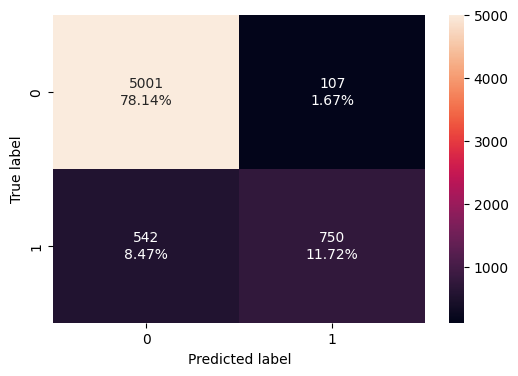

In [77]:
make_confusion_matrix(y_train, y_train_pred3)

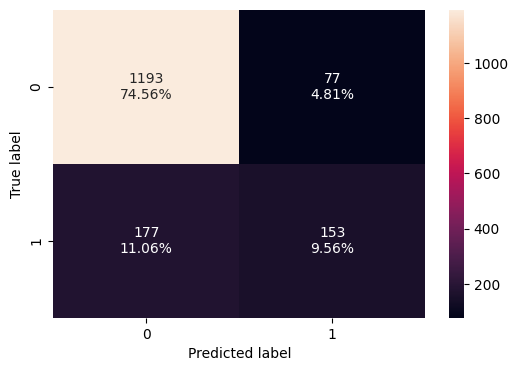

In [78]:
make_confusion_matrix(y_val, y_val_pred3)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [79]:
backend.clear_session()
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)

In [80]:
smote_var  = SMOTE(random_state=7)
X_train_smote, y_train_smote= smote_var.fit_resample(X_train, y_train)

In [81]:
model4 = Sequential()
model4.add(Dense(64, activation="relu", input_dim = X_train_smote.shape[1]))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [83]:
history = model4.fit(X_train_smote, y_train_smote, batch_size=10 ,validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.6933 - recall: 0.7825 - val_loss: 0.6676 - val_recall: 0.6182
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.6532 - recall: 0.5977 - val_loss: 0.6293 - val_recall: 0.6182
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.6274 - recall: 0.6182 - val_loss: 0.6138 - val_recall: 0.6727
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.6065 - recall: 0.6539 - val_loss: 0.5942 - val_recall: 0.6606
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5899 - recall: 0.6705 - val_loss: 0.5788 - val_recall: 0.6545
Epoch 6/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.5771 - recall: 0.6787 - val_loss: 0.5747 - val_recall: 0.6727
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5674 - recall: 0.6936 - val_loss: 0.5632 - val_recall: 0.6606
Epoch 8/100
1

Epoch 59/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4797 - recall: 0.7582 - val_loss: 0.5335 - val_recall: 0.7333
Epoch 60/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4785 - recall: 0.7610 - val_loss: 0.5348 - val_recall: 0.7333
Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4771 - recall: 0.7619 - val_loss: 0.5185 - val_recall: 0.7182
Epoch 62/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4757 - recall: 0.7623 - val_loss: 0.5115 - val_recall: 0.7091
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4744 - recall: 0.7629 - val_loss: 0.5187 - val_recall: 0.7212
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4729 - recall: 0.7655 - val_loss: 0.5215 - val_recall: 0.7242
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4717 - recall: 0.7635 - val_loss: 0.5274 - val_recall: 0.7333
Epoch 

In [84]:
score4 = model4.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4460 - recall: 0.7301


In [85]:
y_train_pred4 = model4.predict(X_train_smote)
y_train_pred4 = (y_train_pred4 > 0.5)
y_train_pred4

320/320 [==============================] - 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [86]:
y_val_pred4 = model4.predict(X_val)
y_val_pred4 = (y_val_pred4 > 0.5)
y_val_pred4

50/50 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [87]:
model_name4 = "Model 4 SDG w/ smote"
train_metric_df.loc[model_name4] = recall_score(y_train_smote,y_train_pred4)
valid_metric_df.loc[model_name4] = recall_score(y_val,y_val_pred4)

In [88]:
cr_4_1 = classification_report(y_train_smote, y_train_pred4)
print(cr_4_1)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5108
           1       0.81      0.77      0.79      5108

    accuracy                           0.80     10216
   macro avg       0.80      0.80      0.80     10216
weighted avg       0.80      0.80      0.80     10216



In [89]:
cr_4_2 = classification_report(y_val, y_val_pred4)
print(cr_4_2)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1270
           1       0.47      0.72      0.57       330

    accuracy                           0.77      1600
   macro avg       0.69      0.75      0.71      1600
weighted avg       0.82      0.77      0.79      1600



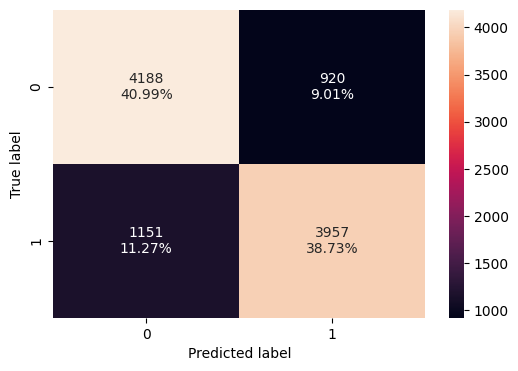

In [90]:
make_confusion_matrix(y_train_smote, y_train_pred4)

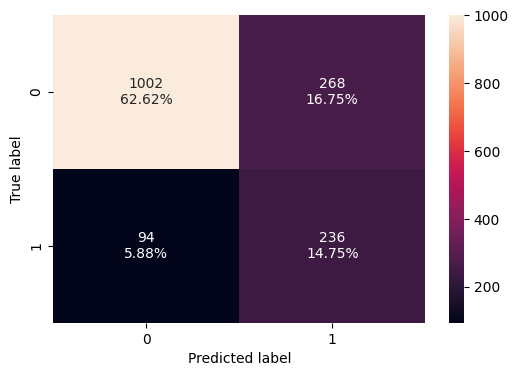

In [91]:
make_confusion_matrix(y_val, y_val_pred4)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [92]:
backend.clear_session()
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)

In [93]:
smote_var5  = SMOTE(random_state=7)
X_train_smote5, y_train_smote5= smote_var5.fit_resample(X_train, y_train)

In [94]:
model5 = Sequential()
model5.add(Dense(64, activation="relu", input_dim = X_train_smote5.shape[1]))
model5.add(Dense(64, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
optimizer = tf.keras.optimizers.Adam(0.001)
metric = keras.metrics.Recall()
model5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [96]:
history = model5.fit(X_train_smote5, y_train_smote5, batch_size=10 ,validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5328 - recall: 0.7112 - val_loss: 0.5271 - val_recall: 0.7333
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4657 - recall: 0.7807 - val_loss: 0.4501 - val_recall: 0.6636
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4378 - recall: 0.7980 - val_loss: 0.5229 - val_recall: 0.7576
Epoch 4/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4192 - recall: 0.7986 - val_loss: 0.4474 - val_recall: 0.6667
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4076 - recall: 0.8091 - val_loss: 0.4091 - val_recall: 0.5939
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3958 - recall: 0.8134 - val_loss: 0.4909 - val_recall: 0.7333
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3889 - recall: 0.8175 - val_loss: 0.4820 - val_recall: 0.7333
Epoch 8/100
1

Epoch 59/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2046 - recall: 0.9266 - val_loss: 0.6495 - val_recall: 0.6424
Epoch 60/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2059 - recall: 0.9272 - val_loss: 0.5955 - val_recall: 0.6000
Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2002 - recall: 0.9297 - val_loss: 0.5897 - val_recall: 0.6030
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1974 - recall: 0.9278 - val_loss: 0.5945 - val_recall: 0.5970
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1983 - recall: 0.9287 - val_loss: 0.6581 - val_recall: 0.6545
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1924 - recall: 0.9336 - val_loss: 0.6495 - val_recall: 0.6727
Epoch 65/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.1913 - recall: 0.9332 - val_loss: 0.6364 - val_recall: 0.6303
Epoch 

In [97]:
score5 = model5.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.7351 - recall: 0.5735


In [98]:
y_train_pred5 = model5.predict(X_train_smote5)
y_train_pred5 = (y_train_pred5 > 0.5)
y_train_pred5

320/320 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [99]:
y_val_pred5 = model5.predict(X_val)
y_val_pred5 = (y_val_pred5 > 0.5)
y_val_pred5

50/50 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [100]:
model_name5 = "Model 5 Adam w/ Smote"
train_metric_df.loc[model_name5] = recall_score(y_train_smote,y_train_pred5)
valid_metric_df.loc[model_name5] = recall_score(y_val,y_val_pred5)

In [101]:
cr_5_1 = classification_report(y_train_smote5, y_train_pred5)
print(cr_5_1)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5108
           1       0.96      0.94      0.95      5108

    accuracy                           0.95     10216
   macro avg       0.95      0.95      0.95     10216
weighted avg       0.95      0.95      0.95     10216



In [102]:
cr_5_2 = classification_report(y_val, y_val_pred5)
print(cr_5_2)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1270
           1       0.52      0.57      0.54       330

    accuracy                           0.80      1600
   macro avg       0.70      0.72      0.71      1600
weighted avg       0.81      0.80      0.81      1600



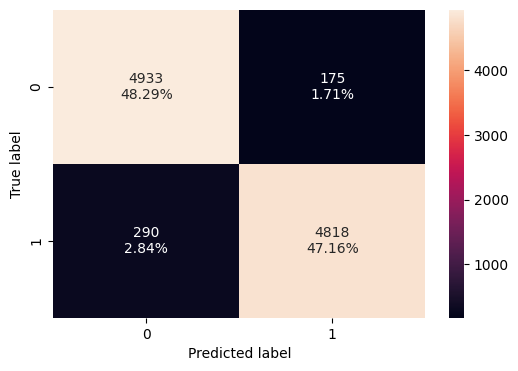

In [103]:
make_confusion_matrix(y_train_smote5, y_train_pred5)

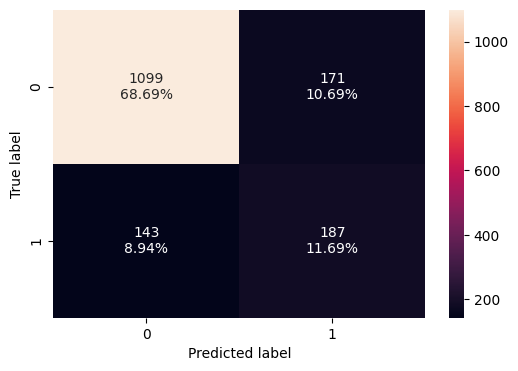

In [104]:
make_confusion_matrix(y_val, y_val_pred5)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [105]:
backend.clear_session()
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)

In [106]:
smote_var6  = SMOTE(random_state=7)
X_train_smote6, y_train_smote6= smote_var6.fit_resample(X_train, y_train)

In [107]:
model6 = Sequential()
model6.add(Dense(64, activation="relu", input_dim = X_train_smote6.shape[1]))
model6.add(Dropout(0.2))
model6.add(Dense(64, activation="relu"))
model6.add(Dropout(0.2))
model6.add(Dense(1, activation="sigmoid"))
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
optimizer = tf.keras.optimizers.Adam(0.001)
metric = keras.metrics.Recall()
model6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [109]:
history = model6.fit(X_train_smote6, y_train_smote6, batch_size=10 ,validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
1022/1022 [==============================] - 5s 4ms/step - loss: 0.5642 - recall: 0.6948 - val_loss: 0.5249 - val_recall: 0.6939
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5102 - recall: 0.7500 - val_loss: 0.4810 - val_recall: 0.6818
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4814 - recall: 0.7649 - val_loss: 0.5307 - val_recall: 0.7515
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4615 - recall: 0.7778 - val_loss: 0.4683 - val_recall: 0.7000
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4480 - recall: 0.7727 - val_loss: 0.4258 - val_recall: 0.6727
Epoch 6/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4416 - recall: 0.7848 - val_loss: 0.4752 - val_recall: 0.7485
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4332 - recall: 0.7886 - val_loss: 0.4555 - val_recall: 0.7182
Epoch 8/100
1

Epoch 59/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.3404 - recall: 0.8504 - val_loss: 0.4967 - val_recall: 0.7333
Epoch 60/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3437 - recall: 0.8504 - val_loss: 0.4868 - val_recall: 0.6939
Epoch 61/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.3409 - recall: 0.8510 - val_loss: 0.4573 - val_recall: 0.6576
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3384 - recall: 0.8543 - val_loss: 0.4598 - val_recall: 0.6727
Epoch 63/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.3365 - recall: 0.8532 - val_loss: 0.4797 - val_recall: 0.6879
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3421 - recall: 0.8461 - val_loss: 0.4814 - val_recall: 0.6879
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3347 - recall: 0.8545 - val_loss: 0.4793 - val_recall: 0.6667
Epoch 

In [110]:
score6 = model6.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4364 - recall: 0.6434


In [111]:
y_train_pred6 = model6.predict(X_train_smote6)
y_train_pred6 = (y_train_pred6 > 0.5)
y_train_pred6

320/320 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [112]:
y_val_pred6 = model6.predict(X_val)
y_val_pred6 = (y_val_pred6 > 0.5)
y_val_pred6

50/50 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [113]:
model_name6 = "Model 6 Adam w/ Dropout and smote"
train_metric_df.loc[model_name6] = recall_score(y_train_smote,y_train_pred6)
valid_metric_df.loc[model_name6] = recall_score(y_val,y_val_pred6)

In [114]:
cr_6_1 = classification_report(y_train_smote6, y_train_pred6)
print(cr_6_1)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5108
           1       0.90      0.91      0.90      5108

    accuracy                           0.90     10216
   macro avg       0.90      0.90      0.90     10216
weighted avg       0.90      0.90      0.90     10216



In [115]:
cr_6_2 = classification_report(y_val, y_val_pred6)
print(cr_6_2)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1270
           1       0.52      0.64      0.57       330

    accuracy                           0.80      1600
   macro avg       0.71      0.74      0.72      1600
weighted avg       0.82      0.80      0.81      1600



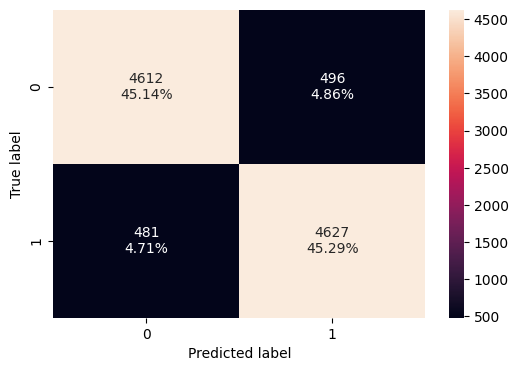

In [116]:
make_confusion_matrix(y_train_smote6, y_train_pred6)

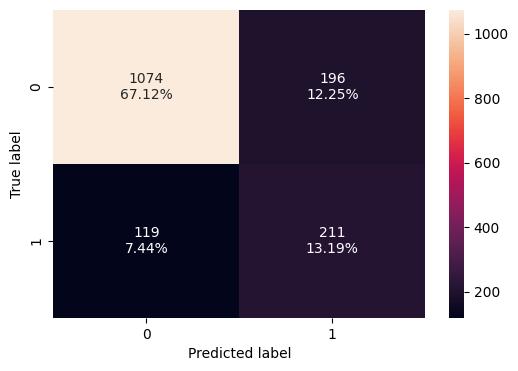

In [117]:
make_confusion_matrix(y_val, y_val_pred6)

## Model Performance Comparison and Final Model Selection

In [118]:
print("Training Performance")
train_metric_df

Training Performance


,recall
Model 1 SDG,0.313467
Model 2 Adam,0.736068
Model 3 Adam w/ Dropout,0.580495
Model 4 SDG w/ smote,0.774667
Model 5 Adam w/ Smote,0.943226
Model 6 Adam w/ Dropout and smote,0.905834


In [119]:
print("Validation Performance")
valid_metric_df

Validation Performance


,recall
Model 1 SDG,0.300000
Model 2 Adam,0.454545
Model 3 Adam w/ Dropout,0.463636
Model 4 SDG w/ smote,0.715152
Model 5 Adam w/ Smote,0.566667
Model 6 Adam w/ Dropout and smote,0.639394


## Actionable Insights and Business Recommendations

* According to the data, Model 4 SDG w/ smote did the best overall as it had the highest recall on the validation set. Models 5 and 6 did better on the test set but when run on validation the recall dropped signifigantly. 

* The business will be able to predict the rate of exit using Model 4 with a 71.5% accuracy.

* This will enable the bank to go after those customers that might have exited with special offers.



<font size=6 color='blue'>Power Ahead</font>
___